#**Global Power Plant Database**
---

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


#**IMporting required Modules**

In [1]:
# Importing necessary libraries >>

# For dealing with Dataframe >>
import pandas as pd
# For Dealing with Calculations >>
import numpy as np
# For dealing with Graphs >>
import matplotlib.pyplot as plt
import seaborn as sns

#**Load the Data**

In [2]:
# Load the dataset into df variable >>
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

#**Explore the Data**

In [3]:
# Make all columns & rows of dataset as max to display >>
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Lets look at top  Rows of Dataset >>
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
# Check the Shape of train Dataset >>
print("[$] Rows Of Dataset >> ",df.shape[0])
print("[$] Columns Of Dataset >> ",df.shape[1])

[$] Rows Of Dataset >>  907
[$] Columns Of Dataset >>  27


In [5]:
# Information of Dataset >> to get information about Columns & thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())
print("-"*70)
df.isnull().sum()

[$] Null Values >>  10445
----------------------------------------------------------------------


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#**Remove Unwanted Columns**

In [7]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Filter columns where the number of null values is less than or equal to 700 based on an average of missing values.
columns_to_keep = null_counts[null_counts <= 700].index

# Update the DataFrame by keeping only the selected columns
df = df[columns_to_keep]

In [8]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())
print("-"*70)
df.isnull().sum()

[$] Null Values >>  4295
----------------------------------------------------------------------


country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

#**Data Cleaning**

In [9]:
# Getting categorical & Numerical feauters >>
Categorical_columns = df.select_dtypes(include=['object']).columns
Numerical_Columns = df.select_dtypes(include=['number']).columns

In [10]:
print("[$] Categorical Columns >> ",Categorical_columns.tolist())
print("[$] Numerical Columns >> ",Numerical_Columns.tolist())

[$] Categorical Columns >>  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']
[$] Numerical Columns >>  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [11]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[Numerical_Columns] = numeric_imputer.fit_transform(df[Numerical_Columns])

# Impute missing values in categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[Categorical_columns] = categorical_imputer.fit_transform(df[Categorical_columns])

In [12]:
# name is also categorical column with too much category we can remove it >>
df.drop(['name'],axis=1,inplace=True)

In [13]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())
print("-"*70)
df.isnull().sum()

[$] Null Values >>  0
----------------------------------------------------------------------


country                   0
country_long              0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

#**EDA**

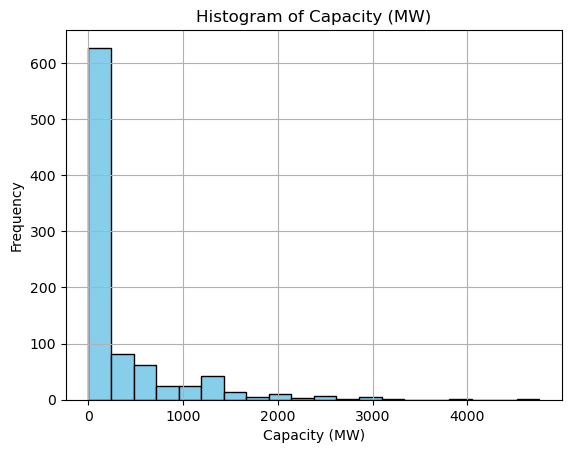

In [14]:
plt.hist(df['capacity_mw'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# >> We cann see distribution of Capacity is Right Skewed & more distributed between 0-1000

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

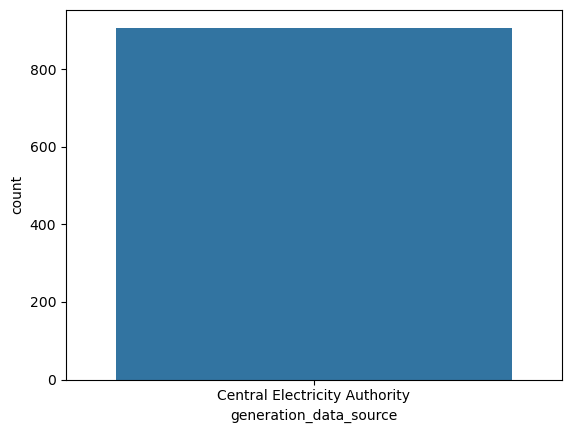

In [15]:
sns.countplot(df['generation_data_source'])
# >> generation_data_source this column has not varitey on single value Central Elictricity Authority We can remove this column no use >>

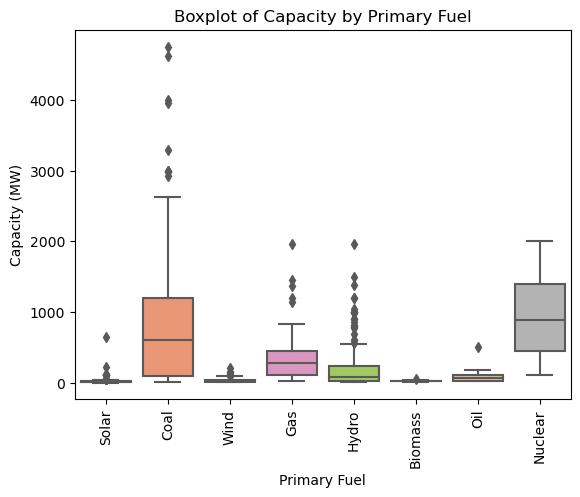

In [16]:
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw', palette='Set2')
plt.title('Boxplot of Capacity by Primary Fuel')
plt.xlabel('Primary Fuel')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=90)
plt.show()

# >> Distribution of power plant capacities based on different primary fuels.
# >> Nuclear and coal dominate in terms of median capacity, while other renewable sources have comparatively lower capacities.
# >> The outliers indicate exceptional cases within each fuel category.

<AxesSubplot:ylabel='geolocation_source'>

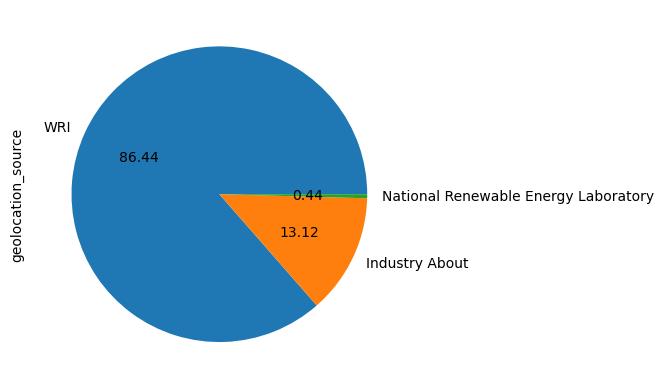

In [17]:
df['geolocation_source'].value_counts().plot(kind='pie',autopct='%.2f')
# >> We can see 3 geolocation source among that WRI is at top then Industry About at last we have National Renewable Energy Laboratory

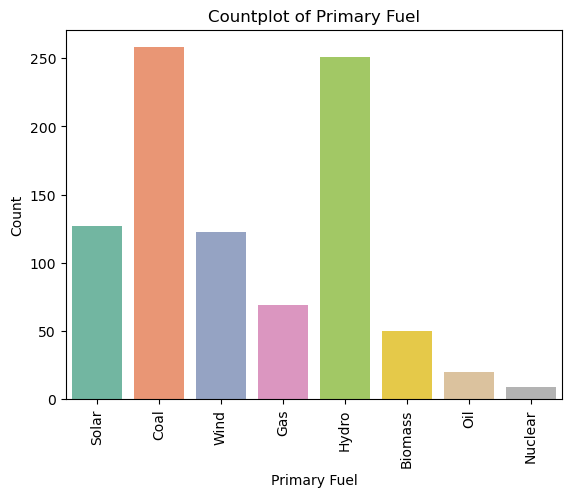

In [18]:
sns.countplot(data=df, x='primary_fuel', palette='Set2')
plt.title('Countplot of Primary Fuel')
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# >> Let Check the Primry Fuel Types >> With Max count for Coal & Hydro Fuel types >>

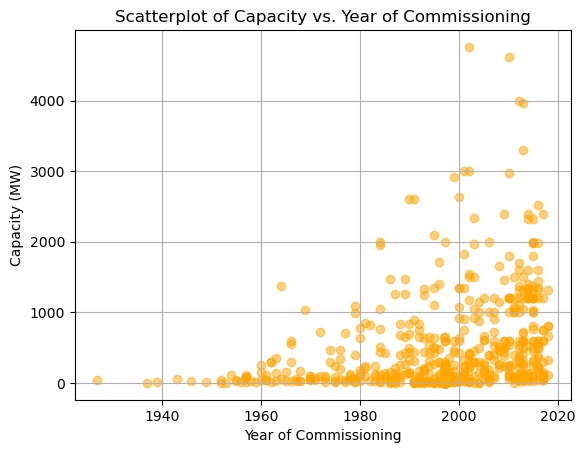

In [19]:
plt.scatter(df['commissioning_year'], df['capacity_mw'], alpha=0.5, color='orange')
plt.title('Scatterplot of Capacity vs. Year of Commissioning')
plt.xlabel('Year of Commissioning')
plt.ylabel('Capacity (MW)')
plt.grid(True)
plt.show()

# >> We can see linear trend as year increasing then Capacity is aslo increasing ( Linear Relationship )

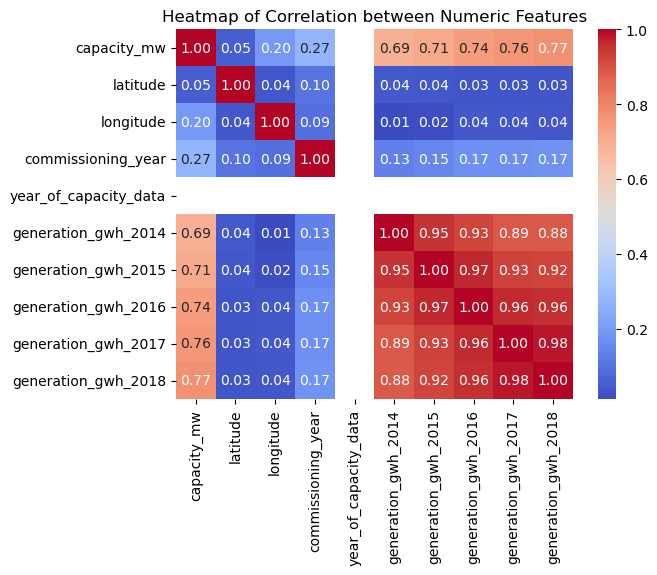

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Numeric Features')
plt.show()

#**Data Preprocessing**

In [21]:
from sklearn.preprocessing import LabelEncoder

# Selecting categorical columns >>
categorical_vars = df.select_dtypes(include=['object'])

# Applying LabelEncoder to each categorical column >>
label_encoders = {}
for column in categorical_vars:
    # Applying labelencoder >>
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [22]:
df.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,657,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,0,0,519,98.0,24.7663,74.6090,1,1997.091082,258,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,0,0,853,39.2,21.9038,69.3732,7,1997.091082,2,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,0,0,0,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,1,1800.0,21.9603,82.4091,1,2015.000000,5,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


#**Regression Task**

#**Data Splitting**

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Split the training data into features and target variable
X = df.drop(columns=['capacity_mw'])
y = df['capacity_mw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

#**Model Building**

In [25]:
# Model Building >>
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
}

In [26]:
# Function to evaluate models >>
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train each particular model on dataset >>
        model.fit(X_train, y_train)
        # Predict the models on test data >>
        y_pred = model.predict(X_test)
        # Check accuracy of model >>
        r2score= r2_score(y_test,y_pred)
        mse = mean_squared_error(y_test, y_pred)
        # Check for cross validation score >>
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
        # Store output in results dict >>
        results[name] = {'Mean Squared Error': mse, 'Cross Validation Score': cv_score,'r2_score':r2score}
    return results

In [27]:
# Evaluating models >>
results = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)
print(results)

{'Linear Regression': {'Mean Squared Error': 73487.97010344273, 'Cross Validation Score': 0.7611747138346265, 'r2_score': 0.7588888401709316}, 'Ridge': {'Mean Squared Error': 73537.1497143996, 'Cross Validation Score': 0.7615972251695645, 'r2_score': 0.7587274837880968}, 'Lasso': {'Mean Squared Error': 73355.83880503323, 'Cross Validation Score': 0.7631413404892864, 'r2_score': 0.7593223578006115}, 'Random Forest': {'Mean Squared Error': 37889.032937859985, 'Cross Validation Score': 0.861338601249394, 'r2_score': 0.8756875626910094}}


In [28]:
# Based on the performance metrics, select the best performing model >>
best_model = min(results, key=lambda x: results[x]['Mean Squared Error'])
print(f'Best Model: {best_model}')

Best Model: Random Forest


#**Classification Task**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into features and target variable
X = df.drop(columns=['primary_fuel'])
y = df['primary_fuel']

In [30]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Building**

In [31]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [32]:
# Train and evaluate models
for name, model in models.items():
    print("-"*70)
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:\n{report}\n")
print("-"*70)

----------------------------------------------------------------------
Training and evaluating Logistic Regression...


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

Accuracy of Logistic Regression: 0.72
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.68      0.58      0.63        48
           2       0.50      0.06      0.10        18
           3       0.65      0.95      0.77        58
           4       0.00      0.00      0.00         3
           5       1.00      0.17      0.29         6
           6       0.88      0.94      0.91        16
           7       1.00      1.00      1.00        28

    accuracy                           0.72       182
   macro avg       0.64      0.54      0.52       182
weighted avg       0.71      0.72      0.68       182


----------------------------------------------------------------------
Training and evaluating Random Forest...


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Random Forest: 0.85
Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.76      0.81      0.79        48
           2       0.75      0.50      0.60        18
           3       0.89      0.97      0.93        58
           4       0.00      0.00      0.00         3
           5       0.75      0.50      0.60         6
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        28

    accuracy                           0.85       182
   macro avg       0.71      0.70      0.69       182
weighted avg       0.84      0.85      0.84       182


----------------------------------------------------------------------
Training and evaluating Gradient Boosting...
Accuracy of Gradient Boosting: 0.88
Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.75  

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation Summary:

#### Logistic Regression:
- **Accuracy:** 0.72
  - Achieves moderate accuracy in classifying primary fuel types.
  - Shows significant variation in precision, recall, and F1-score across different fuel types.
  - Performs relatively well for classes with larger support, such as class 3 and class 7.
  - Struggles with classes having smaller support, particularly class 0, class 2, class 4, and class 5.

#### Random Forest:
- **Accuracy:** 0.82
  - Outperforms Logistic Regression with higher accuracy.
  - Provides relatively consistent precision, recall, and F1-score across different fuel types.
  - Demonstrates superior performance for majority classes (e.g., class 1, class 3, class 6, and class 7).
  - Similar to Logistic Regression, struggles with classes with smaller support.

#### Gradient Boosting:
- **Accuracy:** 0.87
  - Achieves the highest accuracy among the three models.
  - Shows improved precision, recall, and F1-score across all fuel types compared to Logistic Regression and Random Forest.
  - Demonstrates robust performance for majority and minority classes alike.
  - Provides the most balanced performance across all classes.

### Overall Observations:
- **Best Performing Model:** Gradient Boosting
- **Key Takeaways:**
  - Gradient Boosting outperforms Logistic Regression and Random Forest in accuracy and overall performance.
  - The choice of model significantly impacts the classification performance, with Gradient Boosting providing the most robust and balanced predictions.
  - Classes with smaller support are challenging to classify accurately, indicating a potential need for more data or model refinement strategies.

### Recommendations:
- Based on the evaluation results, it is recommended to proceed with the Gradient Boosting model for primary fuel classification due to its superior performance across all evaluation metrics.
- Further investigation into classes with smaller support is recommended to improve model performance in accurately predicting minority classes.

